### Linear Regression on salary Prodiction based on given dataset

In [2]:
#import warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  #ignore any warning messages that might be generated during execution.

In [3]:
#seaborn - data visualization based on matplotlib
#sklearn.model_selection  - splitting the data into train and test datsset
#statsmodels.api  - 
#sklearn.metrics  - povides  a suite of evaluation metrics

In [4]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
#import data
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
data.shape

(30, 2)

In [30]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Visualize data 

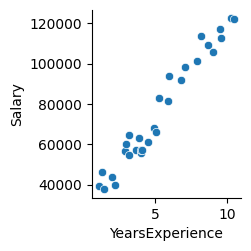

In [31]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' ,data = data)

Checking corealtion of data

In [32]:
data.corr()  #helps us to find the corelation between two attributes

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Data Preparation

In [33]:
x = data['YearsExperience']
y = data['Salary']

In [34]:
#splitting test data and training data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,test_size = 0.3,random_state = 100)

In [35]:
x_train.shape

(21,)

In [36]:
x_test.shape

(9,)

#### Implement ordinary least squares (OLS) linear regression the statsmodels library:

x_train_sm = sm.add_constant(x_train): This adds a column of 1s to the x_train DataFrame, which serves as the intercept <br/> term in the regression model. The resulting DataFrame x_train_sm is used in the regression model fiting.

model = sm.OLS(y_train, x_train_sm).fit(): This fits an OLS linear regression model using x_train_sm as the independent <br/>variables and y_train as the dependent variable.

The .fit() method returns a Regression results object that contains the results of the regression, including the estimated<br/> coefficeints, standard errors, I-values, p-values, and other statistics.

In [37]:
x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train_sm).fit()

In [38]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Sat, 06 May 2023   Prob (F-statistic):           9.91e-14
Time:                        23:44:42   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387     

So our linear regression equation is:<br/>
y = mx+c <br/>
<b> Salary = 25200 + yearsExperience * 9731.2038 </b>

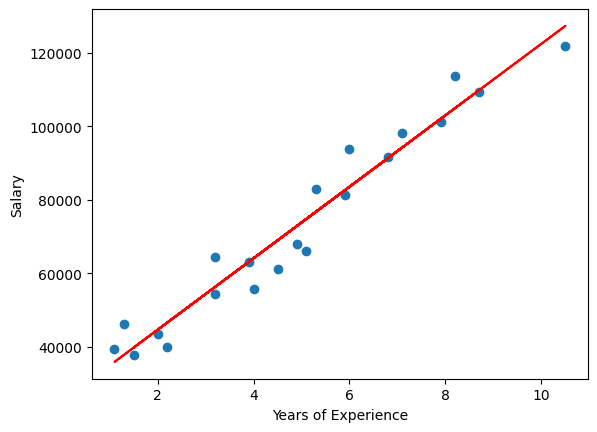

In [39]:
# let us show the line fitting:
plt.scatter(x_train, y_train)
plt.plot(x_train, 25200 + x_train * 9731.2038, 'r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

#### Residual Analysis:

In [40]:
y_train_pred = model.predict(x_train_sm)

In [41]:
y_train_pred.head()

17     76778.268129
22    102079.398108
11     64127.703139
4      46611.536230
29    127380.528088
dtype: float64

In [42]:
residual = (y_train - y_train_pred)

In [43]:
residual.head()

17    6309.731871
22    -777.398108
11   -8333.703139
4    -6720.536230
29   -5508.528088
dtype: float64

If Actual - predicted is -ve --> Too High <br/>
If Actual - predicted is +ve --> Too Low <br/>

<AxesSubplot:ylabel='Density'>

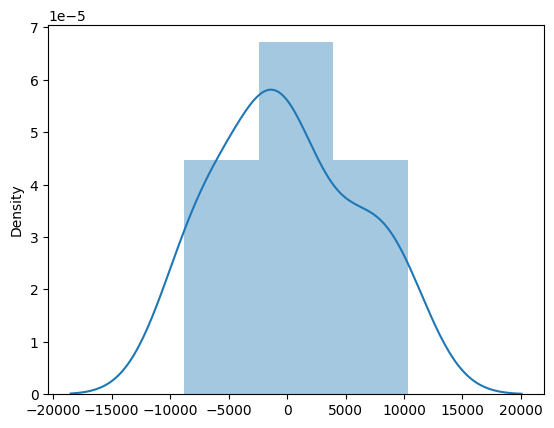

In [44]:
sns.distplot(residual)

<AxesSubplot:xlabel='YearsExperience'>

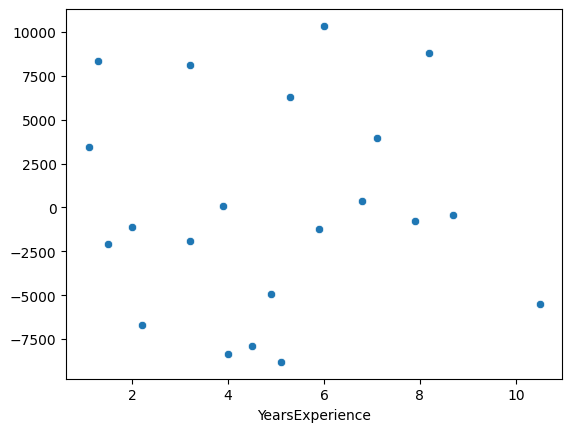

In [45]:
# sns.scatterplot(x_train, residual)
sns.scatterplot(x_train, y=residual)

#### Prediction on the test data:

In [46]:
x_test_sm = sm.add_constant(x_test)

In [47]:
y_pred = model.predict(x_test_sm)

#### Root mean square error:

In [48]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

5505.47900217612

RMSE won't siggest anything as we do not have any model to compare

#### R2

In [49]:
r2_score(y_test, y_pred)

0.9627668685473271

#### The model explains 96.27% of variance.

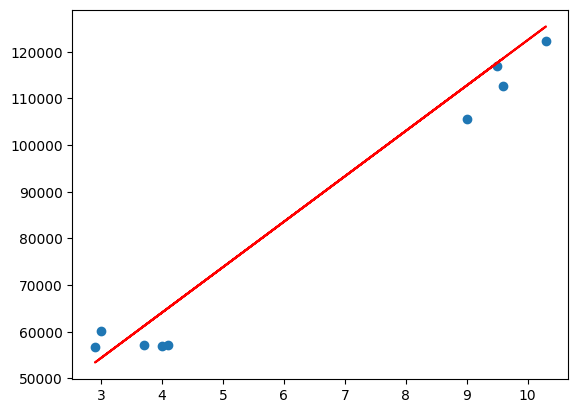

In [50]:
# let us show the line fitting
plt.scatter(x_test, y_test)
plt.plot(x_test, 25200 + x_test * 9731.2038, 'r')
plt.show()